### Agent Key Feature
##### Understand user goals:
Interpret and translate user intentions into actionable tasks. 
##### Plan and execute:
Develop and implement strategies to achieve those goals. 
##### Monitor and adapt:
Track progress, identify issues, and adjust their approach as needed. 
##### Collaborate:
Work with other agents, both AI and human, to complete complex tasks. 

In [1]:
from langgraph.graph import StateGraph, START, END
from langchain_ollama import ChatOllama
from typing import TypedDict, Literal, Annotated,Optional
from pydantic import BaseModel, Field

In [2]:
model = ChatOllama(model='llama3.2')

model1 = ChatOllama(model='llama3.2')
model2 = ChatOllama(model='deepseek-r1')
model3 = ChatOllama(model="gemma3")

In [3]:
class AgentState(TypedDict):
    user_input: Annotated[str,'User Initital Input']
    goal_understand: Annotated[str,'Understand User Goal']
    planning: Annotated[str,'Planning by agent based on tools availablity']
    intermediate: Optional[str]
    

In [ ]:
def goal_understand(state: AgentState):
    user_input = state['user_input']
    from langchain_core.prompts import ChatPromptTemplate

    # prompt_template = ChatPromptTemplate([
    #     ("system", "You are a helpful assistant"),
    #     ("user", "Analyze the  {user_input}")
    # ])

    # Update system prompt to emphasize goal understanding and human-in-the-loop
    prompt_template = ChatPromptTemplate([
        ("system", "You are a helpful assistant collaborating with a human agent to deeply understand the user's goal. Ask clarifying questions if needed."),
        ("user", "Analyze the {user_input} and suggest clarifications if the goal is ambiguous.")
    ])
    
    # Invoke the prompt and get the AI's response
    ai_response = prompt_template.invoke({"user_input": user_input})
    
    # Human in the loop: print AI response and get human feedback
    print("AI's understanding of the goal:", ai_response)
    human_feedback = input("Do you want to clarify or add anything to your goal? If yes, please provide details: ")
    
    # Update state with human feedback if provided
    if human_feedback.strip():
        state['goal_understand'] = f"{ai_response}\nHuman clarification: {human_feedback}"
    else:
        state['goal_understand'] = str(ai_response)
    
    return state

In [8]:
def planning(state: AgentState):
    pass

In [9]:
def executor(state: AgentState):
    pass

In [10]:
workflow = StateGraph(AgentState)
workflow.add_node('goal_understand',goal_understand)
workflow.add_node('planning', planning)
workflow.add_node('executor',executor)

workflow.add_edge(START,'goal_understand')
workflow.add_edge('goal_understand','planning')
workflow.add_edge('planning','executor')
workflow.add_edge('executor',END)
graph = workflow.compile()

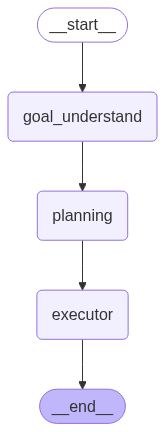

In [11]:
graph